In [42]:
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

Getting 1000 samples of a normal distribution. Verifying they fall within that distribution

In [43]:
mean = 0 
sd = 1
X = stats.norm(mean, sd)
samples = X.rvs(100000)
a, b = np.percentile(samples, [2.5, 97.5])
sample_range = b - a
if np.isclose(np.mean(samples), mean, atol=0.01):
    print("Sample mean is about equal to distribution mean")
if np.isclose(np.std(samples), sd, atol=0.01):
    print("Sample standard deviation is about equal to distribition std")
if np.isclose(sample_range , 2*1.95, atol=0.1):
    print("Sample 95% range is close to the distribition IQR")

Sample mean is about equal to distribution mean
Sample standard deviation is about equal to distribition std
Sample 95% range is close to the distribition IQR


In [44]:
def observed_prop(x, X):
    """
    Given an observed value, return the observed sample proportion
    of that value in the data. 
    
    Params
    ------
        x (any): observation you want the frequency for
        X (List): list of samples from which to calculate proportion
    
    Returns
    -------
        proportion (float): proportion of sample where x was observed
    """
    count = sum([1 if x_i==x else 0 for x_i in X])
    return count / len(X)

def p_normal(x, mu, std): 
    """
    Return the probability of observing X assuming X ~ N(mu, std)

    Params
    ------
        mu (float): the mean parameter of the normal 
        std (float): the sd parameter of the normal 
    
    Returns
    -------
        p_x (float): probability of observing x given X ~ N(mu, std)
    """
    return (1 / (std * np.sqrt(2 * np.pi))) * np.e ** (-1 * ((x - mu)**2/(2 * std**2)))


Now let's verify that the sample proportions equal the probability distribution of the Normal

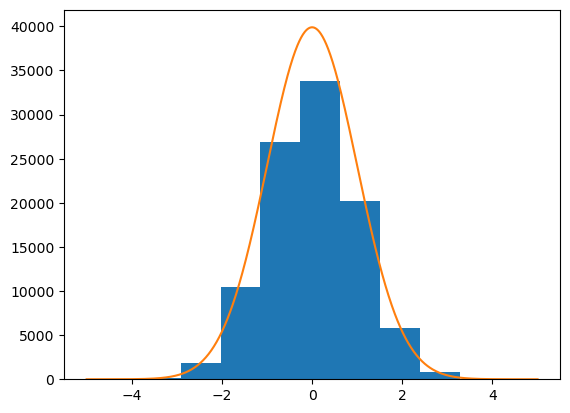

In [45]:
mean = 0 
sd = 1
X = stats.norm(mean, sd)
samples = X.rvs(100000)
observed = []
pdf = []

for x_i in np.linspace(-5, 5, 1000):
    observed = np.append(observed, observed_prop(x_i, samples))
    pdf = np.append(pdf, p_normal(x_i, mean, sd))

# plot the sample distribution
plt.hist(samples)

#plot the pdf
plt.plot(np.linspace(-5, 5, 1000), pdf * 100000)

plt.show()
    
        


Remember Bayes' rule? 

$$ p(\theta | y) = \frac{p(y|\theta)p(\theta)}{p(y)}$$

The probability of the model being true given some data is the probability of that data arising from that model, times the prior probability of that model, divided by the probability of the data.

You can swap "model" with hypothesis. 

To conceptualize models we'll need to break Bayes' Rule down to meaningful parts: 

$$ p(\theta): Prior$$
$$ p(y | \theta): Likelihood $$
$$ p(\theta | y): Posterior $$
$$ p(y): Marginal\:Likelihood $$

The <strong>prior distribution</strong> should reflect what we know about the value of the $ \theta $ parameter before seeing the data. 

The <strong>likelihood</strong> is an expression of the plausibility of the data given the parameters. 

The <strong>posterior distribution</strong> is the result of our Bayesian analysis, and reflects all information about the problem (given our data and model). The posterior is a probability distribution (pdf) for the $\theta$ parameters in our model. 

<em>Note: Coneceptually we can think of the posterior as the updated prior in light of our data. In fact, the posterior from one analysis can be used as the prior for a new analysis (ex: online algorithms)</em>

The <strong>marginal likelihood</strong>, also known as <strong>evidence</strong> is the probability of observing the data averaged over all possible values the parameters can take. 

The marginal likelihood is a little less important. Often we omit this when describing posteriors. We can do this by describing the posterior as a probability function <em>proportional to</em> the prior and the likelihood. 

$$ p(\theta | y) \propto p(y|\theta)\:p(\theta)$$

Why can we omit it? Well, the denominator exists so that the integral of the posterior distribution is equal to 1, but that's not necessary to do inference. The curve of the posterior distribution won't change by omitting the denominator, only the scale on the y-axis. 

#### Single Parameter Inference

Probabilities are used to measure the uncertainty we have about parameters, and Bayes' theorem is the mechanism to correctly update those probabilities in light of new data, hopefully reducing our uncertainty. 

To explore inference, we'll do the age-old coin flipping problem. 

Problem Statement: Given an array of coin flips (0 for heads, 1 for tails), return True or False if the coin is biased. 

For us to do a Bayesian Analysis, we'll need to define our 4 parts: Prior, Likelihood, Posterior, and Marginal Likelihood. 

We'll start by defining our <em>prior</em> as the probability of getting heads, or our <strong>bias</strong>. If $\theta = 1$, then we expect all heads. 0, we expect all tails. 0.5, heads half the time, tails half the time. 

Next we'll define our <em>likelihood</em>. In this case, our likelihood would be the probability of getting our data given our bias $\theta$ and the number of trials. We can expect coin flips to be independent, identically distributed. A binomial distribution would be a good fit for this. We can write this as: 

$$ p(y|\theta, N) = \binom{N}{y}\theta^{y}(1 - \theta)^{(N-y)} $$

Let's code up a function for our likelihood.





In [46]:
def binomial_pmf(y, theta, N):
    """
    Given number of successes y, a probability of success
    theta, and number of trials N, return the probability of getting
    exactly K successes. 

    Params
    ------
        y (int): Number of successful trials 
        theta (float): Probability of success of each trial 
        N (int): Number of trials 
    
    Returns
    -------
        (float): probability of getting exactly y successes
    """
    return math.comb(N, y) * theta ** y * (1-theta)**(N-y)

Text(0, 0.5, 'p(y|θ, N)')

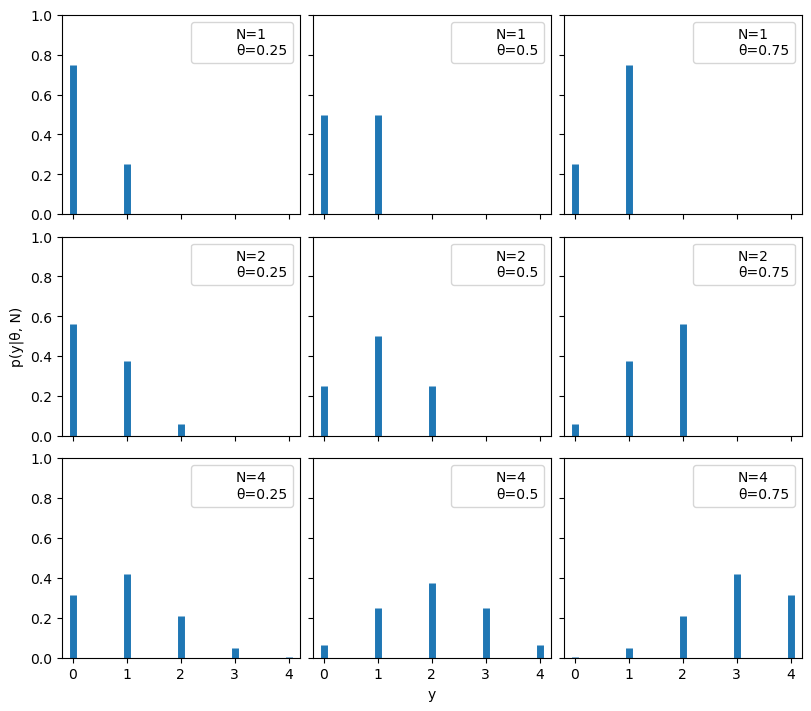

In [47]:
n_params = [1, 2, 4] # number of trials
p_params = [0.25, 0.5, 0.75] # probability of success

x = np.arange(0, max(n_params) + 1) # range of num successes
# Make a matplotlib figure. Subdivide it into subplots we'll iterate over
fig, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True, figsize=(8,7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = [binomial_pmf(x_i, p, n) for x_i in x]

        ax[i, j].vlines(x, 0, y, colors='C0', lw=5) # draw vertical lines
        ax[i, j].set_ylim(0, 1) # probability goes from 0 to 1
        ax[i, j].plot(x, y, alpha=0, label=f"N={n}\nθ={p}")
        ax[i, j].legend()

ax[2, 1].set_xlabel('y')
ax[1, 0].set_ylabel('p(y|θ, N)')

Ok this looks like a good likelihood distribution. When our bias approaches 1, we see more successes. When our bias approaches 0, we see more failures. 

This, however, doesn't tell us the bias given data. When we have a likelihood, and we want to find the probability of the parameter, we use a prior and combine both via Bayes' rule.

#### Choosing the Prior

For this prior we'll choose the beta distribution. The beta distribution goes as follows: 

$$ p(\theta| \alpha, \beta) = \frac{\Gamma{(\alpha + \beta)}}{\Gamma{(\alpha)}\Gamma{(\beta)}}\:\theta^{\alpha - 1}\:(1-\theta)^{\beta - 1}$$

The first term of this is just a normalization constant. It exists so our function outputs probabilities in the range(0, 1) and all our probabilities sum to 1. So in reality we can rewrite this as a proportion: 

$$ p(\theta| \alpha, \beta) \propto \theta^{\alpha - 1}\:(1-\theta)^{\beta - 1}$$

We choose the gamma distribution for a couple reasons. One is that it's a very versatile function. We can produce a lot of shapes by varying $\alpha$ and $\beta$, making it possible to model normal and uniform-like distributions from the same function, just tuning the parameters. See for yourself:

In [48]:
def beta_pdf(theta, alpha, beta):
    """
    Given the beta parameters alpha and beta, return the probability density
    at theta

    Params 
    ------
        theta (float-like): observation you'd like probability density for
        alpha (float-like): alpha parameter of beta dist
        beta (float-like): beta parameter of beta dist
    
    Returns
    -------
        prob_density (float): probability density at theta of B(alpha, beta)
    """
    norm_constant = scipy.special.gamma(alpha + beta) / (scipy.special.gamma(alpha) * scipy.special.gamma(beta))
    return  norm_constant * theta ** (alpha - 1) * (1 - theta) ** (beta - 1)

/var/folders/mn/xk12q_t57y1889l8g92dyp8m0000gn/T/ipykernel_82309/2425308842.py:17: RuntimeWarning: divide by zero encountered in scalar power
  return  norm_constant * theta ** (alpha - 1) * (1 - theta) ** (beta - 1)


Text(0.07, 0.5, 'p(θ)')

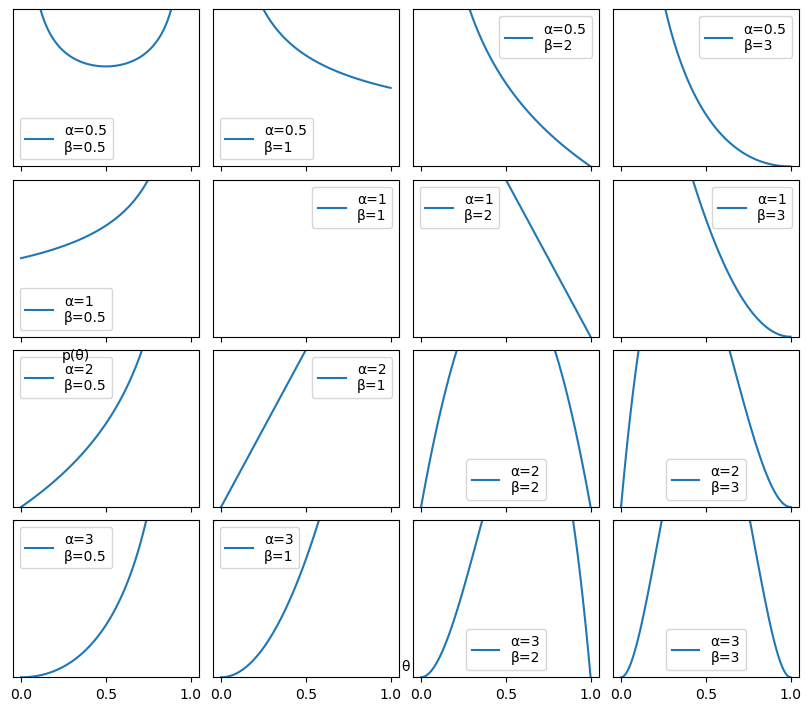

In [49]:
params = [0.5, 1, 2, 3] #example params for alpha and beta

x = np.linspace(0, 1, 100) # Our bias goes from [0, 1]. This gives us 100 example theta values to draw the pdf
# Make a matplotlib figure. Subdivide it into subplots we'll iterate over
fig, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True, figsize=(8,7), constrained_layout=True)

for i in range(len(params)):
    for j in range(len(params)):
        a = params[i]
        b = params[j]

        y = [beta_pdf(x_i, a, b) for x_i in x]

        ax[i, j].set_ylim(0, 1) # probability goes from 0 to 1
        ax[i, j].plot(x, y, label=f"α={a}\nβ={b}")
        ax[i, j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
fig.text(0.5, 0.05, 'θ', ha='center')
fig.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)

The other reason we want to use the beta distribution, is because it's proportional to the binomial. Recall from above: 

$$ p(\theta| \alpha, \beta) \propto \theta^{\alpha - 1}\:(1-\theta)^{\beta - 1}$$

And finally it's because the beta distribution and the binomial distribution are <strong>conjugate pairs</strong>. The beta distribution is the <strong>conjugate prior</strong> of the binomial distribution. This means that when used as a prior for the binomial dist. as the likelihood, the posterior will have the same functional form as the prior. 

In simpler terms, everytime we use the beta distribution as the prior of the binomial distribution, we'll get a beta distribution as the posterior. 

#### Getting the Posterior

Recall Bayes theorem of posterior proportionality: 

$$ p(\theta | y) \propto p(y|\theta)\:p(\theta)$$

We can express our coin flipping problem in these terms. We know that 

$$ Likelihood: \: p(y|\theta, N) = \binom{N}{y}\theta^{y}(1 - \theta)^{(N-y)} $$
$$ Prior: \:p(\theta| \alpha, \beta) \propto \theta^{\alpha - 1}\:(1-\theta)^{\beta - 1}$$

So, written to fit Bayes' theorem of posterior proportionality: 

$$ Posterior: p(\theta | y) \propto \binom{N}{y}\theta^{y}(1 - \theta)^{(N-y)} \: \theta^{\alpha - 1}\:(1-\theta)^{\beta - 1} $$

The binomial coefficient does not depend on theta, we can drop it (since we're only describing proportionality right now). Same goes for the normalization coefficient in our beta prior (though we already removed it).

$$ Posterior: p(\theta | y) \propto \theta^{y}(1 - \theta)^{(N-y)} \: \theta^{\alpha - 1}\:(1-\theta)^{\beta - 1} $$


Doing some algebraic cleanup we get

$$ p(\theta | y) \propto \theta^{y + \alpha - 1} (1 - \theta)^{N - y + \beta - 1} $$

Which looks familiar right? This is just another beta distribution. This is what we meant by the beta being the conjugate prior of the binomial. You end up with another beta distribution. 

$$ p(\theta | y) \propto Beta(\alpha_{prior} + y, \beta_{prior} + N-y) $$

Let's see all this in action. Let's first make a function to generate a sample of coin flips with some specified theta_real. 

In [50]:
def get_flips(N, p):
    """
    Return a number representing 
    the successes of N trials with probability 
    of success theta. Follows binomial distribution
    """
    return np.random.binomial(N, p)

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
theta_real = 0.35
successes = [get_flips(n, theta_real) for n in n_trials]
successes

[0, 1, 2, 1, 1, 3, 8, 17, 15, 46]

Now we'll make some plots where we iterate over some possible combinations of the $\alpha$ and the $\beta$. (alpha=1, beta=1) will make a more uniform prior (BLUE). (alpha=20, beta=20) will make a normal-like prior with a mode at 0.5 (ORANGE). (alpha=1, beta=4) will make a skewed prior (GREEN).

/var/folders/mn/xk12q_t57y1889l8g92dyp8m0000gn/T/ipykernel_82309/1972841401.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


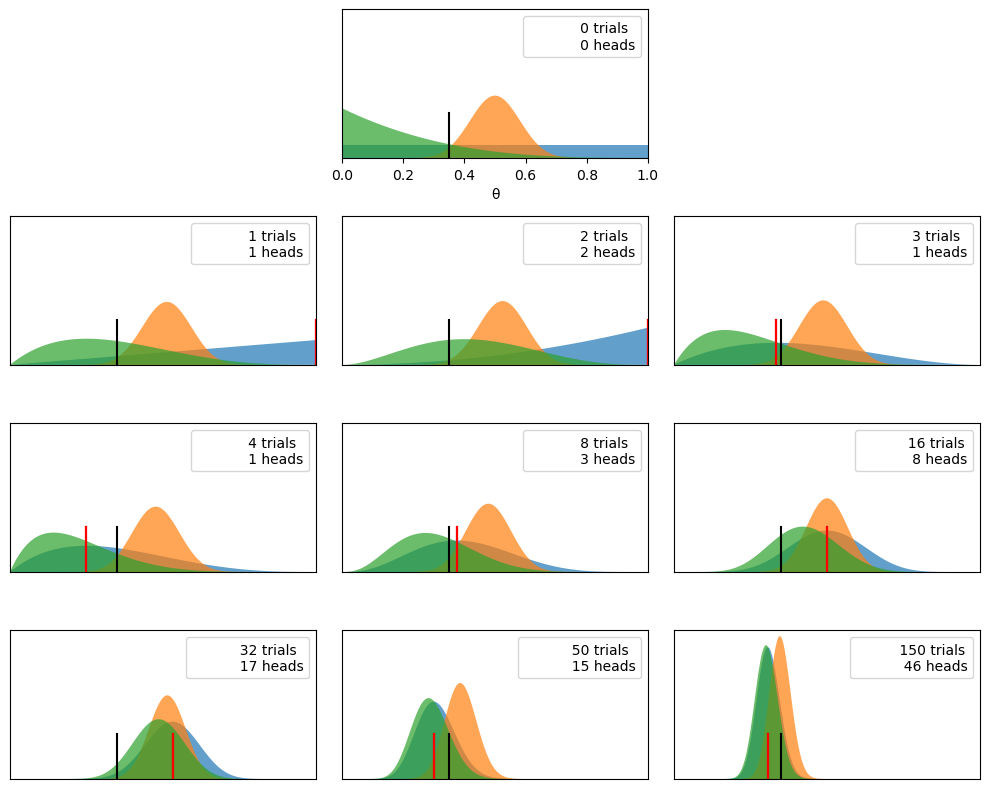

In [57]:
plt.figure(figsize=(10, 8))
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

for index, N in enumerate(n_trials):
    if index == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, index+3)
        plt.xticks([])
    y = successes[index]
    for (a_prior, b_prior) in beta_params:
        posterior = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, posterior, alpha=0.7)
        if N > 0:
            observed_theta = y / N
            plt.axvline(observed_theta, ymax=0.3, color='r')
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
    plt.tight_layout()

Notice that as the number of trials increase, the mode of our posterior distributions get closer to the true theta. In addition, the "spread" of these distributions is narrow, indicating certainty of the true value of theta. Given a sufficient amount of data, two or more bayesian models with different priors will tend to converge to the same result. 

How fast posteriors converge to the same distribution depends on the data and the model. The orange model was more concentrated on the mode (low spread, high probability in mode). Thus it took more trials to converge on the true theta of the data. 

One more thing: we'd get the same result for posterior if we updated sequentially than if we did it all at once. We can compute the posterior 150 times, each time adding another observation and using the new posterior as the next iteration's prior. This will be exactly equal to computing one posterior for the 150 tosses at once. 

#### Summarizing the Posterior 

Posteriors encode a lot of information. They contain all the information about the parameters given a dataset, and the model that may govern it. By summarizing a posterior, we are also summarizing the logical consequences of a model and data. 

A common way to summarize posterior distributions is to report the summary statistics of each parameter to have an idea of the center and spread of each measure. 

#### High-posterior density 
One way to summarize is the High-Posterior Density (HPD). An HPD is the shortest interval containing a given portion of the probability density. Example: a 95% HPD will have the shortest interval of parameter values containing 95% of the probability density. 

We can use ArviZ to do EDA of Bayesian models and get these summaries. 

<Axes: title={'center': 'θ'}>

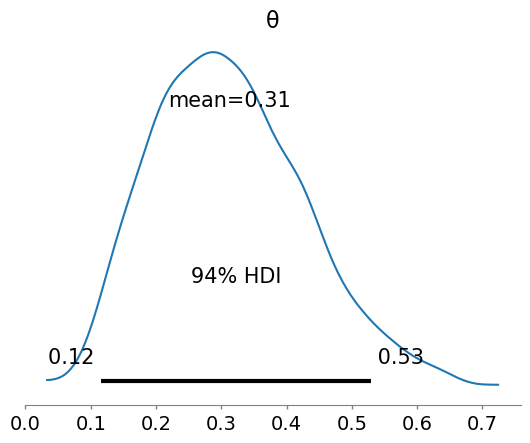

In [54]:
import arviz as az

np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})

These intervals are more credible than frequentist confidence intervals. Only in Bayesian Analysis can we find the probability of a parameter in the data. This is not possible in the frequentist framework, since parameters are fixed by design.

#### Posterior Predictive Checks 

If we have the posterior, it's possible to use it to generate predictions. That is, we can use posterior $p(\theta|y)$ to generate predictions of the probability of $\hat{y}$.

$$ p(\hat{y}|y) = \int{p(\hat{y}|\theta)p(theta|y)d\theta} $$

Thus, the posterior predictive distribution is an average of conditional predictions over the posterior distribution of $\theta$.

We can use this to make predictions, but also use it to measure model viability by comparing observed data to the predicted data and checking consistency. The generated data and the observed data should more or less looks similar. 

### Exercises 

1) 

Probability notation that corresponds to the sentence: <em>The probability of being sunny given that it is 9th of July of 1816</em>.

$$ p(sunny|\:9th\:of\:July\:of\:1816) $$

2)

Why is the probability of choosing a human at random and picking the Pope not the same as the probability of the Pope being human? 

We know: $p(Pope) = 1/(numHumans)$, and that  $p(Human) = 1$

$$ p(Pope | Human) = \frac{p(Human | Pope)p(Pope)}{p(Human)} $$
$$ p(Pope | Human) = p(Pope) $$

$$ p(Human | Pope) = 1$$

3) 

Priors: $\mu \sim Normal(0, 10)$ and $\sigma \sim HalfNormal(25)$ 

Likelihood: $y_{i} \sim Normal(\mu, \sigma)$

4) 

The posterior will have three parameters $p(\mu, \sigma| y)$

5) 

$$p(\mu,\sigma| y) \propto p(y | \mu, \sigma)p(\mu)p(\sigma) $$